# Lista de Exercícios 03

### João Victor Aquino Correia (470914)

#### Preparando o ambiente

**Importação das bibliotecas**

In [137]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [180]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

**Carregando e definindo as colunas do dataset**

In [11]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento',
           'petal_largura','tipo']
data = pd.read_csv('iris-dataset.csv',names=columns)

#### Trabalhando com os dados

In [12]:
data.head(10)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [13]:
data.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
data.shape

(150, 5)

In [16]:
data.groupby('tipo').size()

tipo
setosa        50
versicolor    50
virginica     50
dtype: int64

In [17]:
data['tipo'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: tipo, dtype: int64

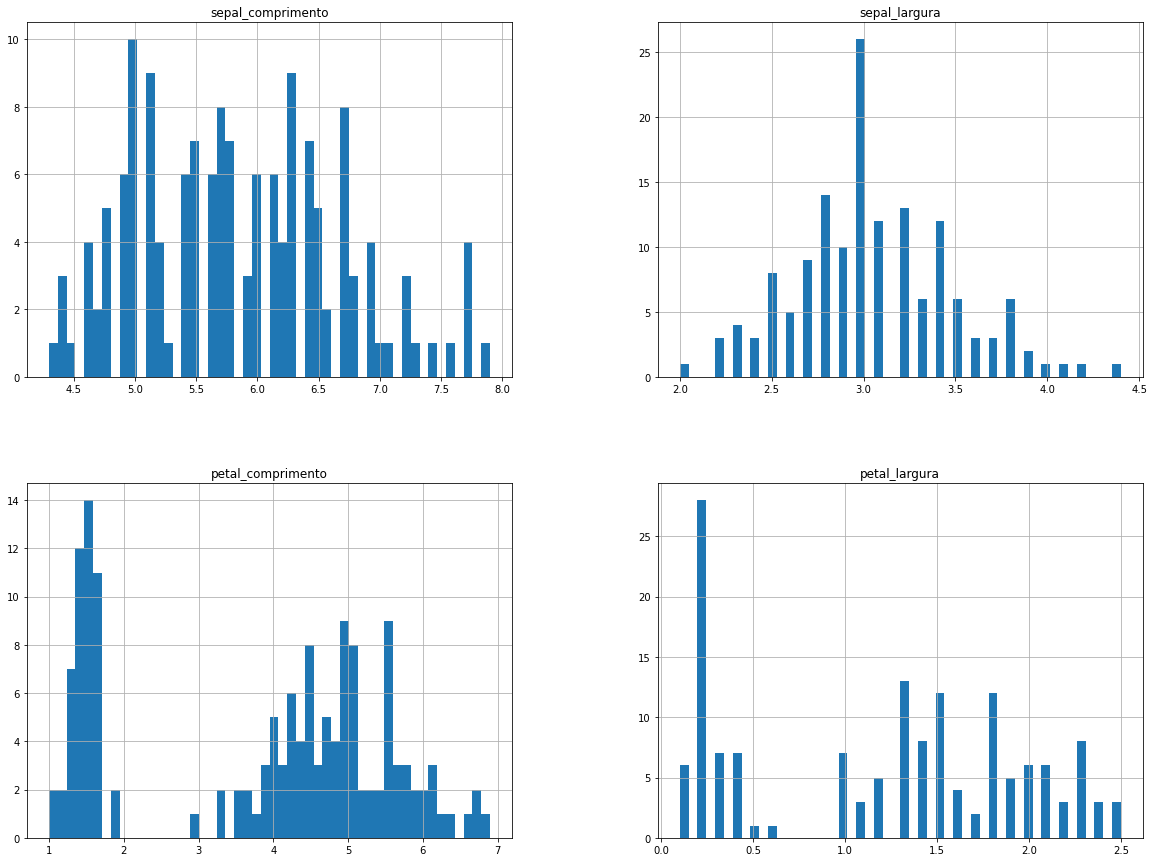

In [44]:
data.hist(bins=50, figsize=(20,15));

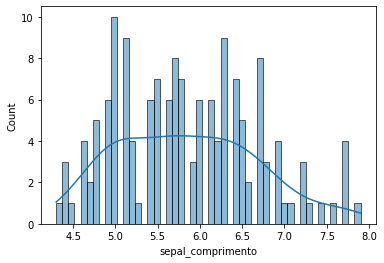

In [47]:
sns.histplot(data['sepal_comprimento'], bins=50, kde=True);

<AxesSubplot:xlabel='petal_comprimento', ylabel='petal_largura'>

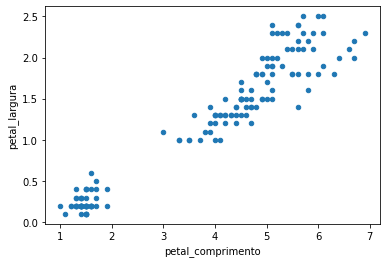

In [52]:
data.plot(kind="scatter", x="petal_comprimento", y="petal_largura")

<AxesSubplot:xlabel='petal_comprimento', ylabel='petal_largura'>

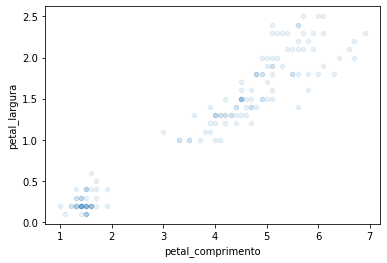

In [54]:
#  alpha em 0,1 facilita a visualização dos locais onde existe uma alta densidade de pontos de dados
data.plot(kind="scatter", x="petal_comprimento", y="petal_largura", alpha=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


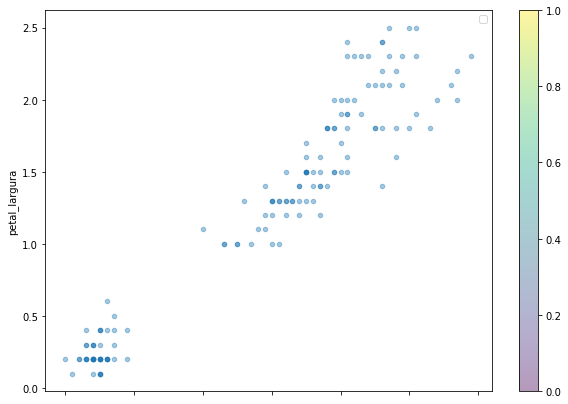

In [56]:
data.plot(kind="scatter", x="petal_comprimento", y="petal_largura", alpha=0.4, figsize=(10,7),
          cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [ ]:
data.corr()

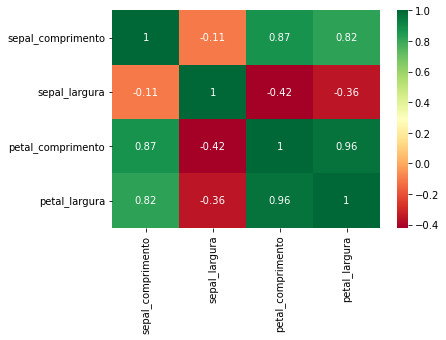

In [21]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn');

**Criação do dataset de validação**

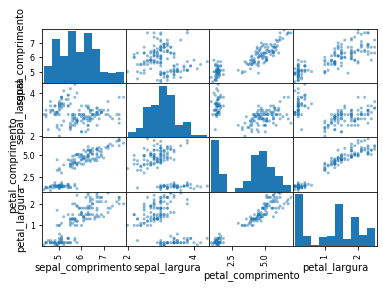

In [22]:
scatter_matrix(data);

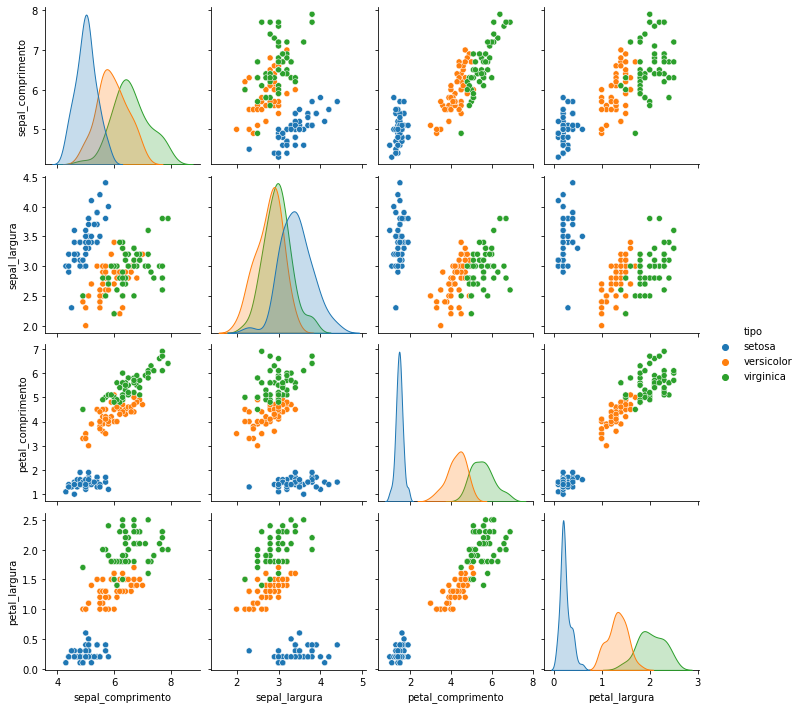

In [23]:
sns.pairplot(data, hue='tipo');

#### Manipulando Texto e Atributos Categóricos

In [71]:
# pd.factorize(data['tipo'])
tipo = data['tipo']
tipo_encoded, tipo_categories = tipo.factorize()
tipo_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
tipos_num = pd.factorize(data['tipo'])[0]
tipos_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [166]:
encoder = OneHotEncoder()
tipo_1hot = encoder.fit_transform(tipo_encoded.reshape(-1,1))
tipo_1hot = tipo_1hot.toarray()

#### Escalonamento das Características

In [167]:
# Features
#X = pd.get_dummies(data.drop(['tipo'], axis=1)).to_numpy()
X = data.drop(['tipo'], axis=1).to_numpy()
# Labels
#y = pd.get_dummies(df['class'], drop_first=True).to_numpy().squeeze()
#y = data['tipo']
y = tipos_num

In [168]:
# Dividindo em conjunto de train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [152]:
scalerX = MinMaxScaler()
X_train = scalerX.fit_transform(X_train)
X_train

array([[0.02777778, 0.375     , 0.05172414, 0.04166667],
       [0.16666667, 0.20833333, 0.5862069 , 0.66666667],
       [0.69444444, 0.33333333, 0.63793103, 0.54166667],
       [0.16666667, 0.45833333, 0.06896552, 0.        ],
       [0.33333333, 0.20833333, 0.5       , 0.5       ],
       [0.55555556, 0.20833333, 0.67241379, 0.75      ],
       [0.36111111, 0.29166667, 0.53448276, 0.5       ],
       [0.55555556, 0.33333333, 0.68965517, 0.58333333],
       [0.94444444, 0.41666667, 0.86206897, 0.91666667],
       [0.94444444, 0.75      , 0.96551724, 0.875     ],
       [0.91666667, 0.41666667, 0.94827586, 0.83333333],
       [0.47222222, 0.375     , 0.5862069 , 0.58333333],
       [0.19444444, 0.        , 0.4137931 , 0.375     ],
       [0.41666667, 0.29166667, 0.51724138, 0.375     ],
       [0.41666667, 0.25      , 0.5       , 0.45833333],
       [0.11111111, 0.5       , 0.0862069 , 0.04166667],
       [0.22222222, 0.75      , 0.06896552, 0.08333333],
       [0.66666667, 0.20833333,

In [153]:
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)

In [150]:
num_pipeline = Pipeline([
 ('std_scaler', StandardScaler()),
 ])

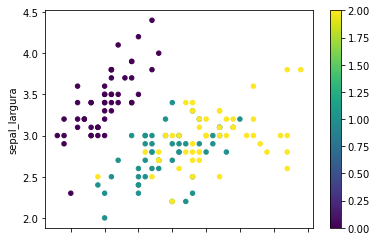

In [26]:
data.plot.scatter(x='sepal_comprimento', y='sepal_largura', c=tipos_num, cmap='viridis');

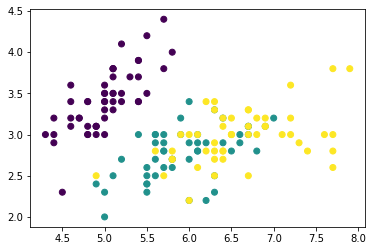

In [27]:
plt.scatter(data['sepal_comprimento'], data['sepal_largura'], c=tipos_num);

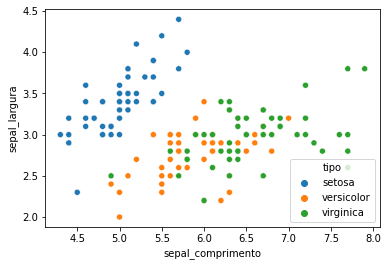

In [28]:
sns.scatterplot(x=data['sepal_comprimento'], y=data['sepal_largura'], hue=data['tipo']);

In [30]:
dataset = data.values
dataset

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [31]:
np.random.seed(1)
np.random.shuffle(dataset)

In [32]:
dataset

array([[5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.1, 2.5, 3.0, 1.1, 'versicolor'],
       [6.6, 3.0, 4.4, 1.4, 'versicolor'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [7.9, 3.8, 6.4, 2.0, 'virginica'],
       [6.3, 3.3, 4.7, 1.6, 'versicolor'],
       [6.9, 3.1, 5.1, 2.3, 'virginica'],
       [5.1, 3.8, 1.9, 0.4, 'setosa'],
       [4.7, 3.2, 1.6, 0.2, 'setosa'],
       [6.9, 3.2, 5.7, 2.3, 'virginica'],
       [5.6, 2.7, 4.2, 1.3, 'versicolor'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [7.1, 3.0, 5.9, 2.1, 'virginica'],
       [6.4, 3.2, 4.5, 1.5, 'versicolor'],
       [6.0, 2.9, 4.5, 1.5, 'versicolor'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [5.8, 2.6, 4.0, 1.2, 'versicolor'],
       [5.6, 3.0, 4.5, 1.5, 'versicolor'],
       [5.4, 3.4, 1.5, 0.4, 'setosa'],
       [5.0, 3.2, 1.2, 0.2, 'setosa'],
       [5.5, 2.6, 4.4, 1.2, 'versicolor'],
       [5.4, 3.0, 4.5, 1.5, 'versicolor'],
       [6.7, 3.0, 5.0, 1.7, 'versicolor'],
       [5.0, 3.5, 1.3, 0.3, 'setosa'],
       [

In [173]:
X = dataset[:,:4]
y = dataset[:,4]

In [174]:
n_train = int(round(len(y) * 0.75))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

In [175]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 4), (150,), (112, 4), (112,), (38, 4), (38,))

#### Criação dos modelos

**Classificadores utilizados:**


* DecisionTreeClassifier

* SVC

* KNN

* Logistic Regression

* Naive Bayes

* SGDClassifier

* RandomForest

* GradientBoosting

In [176]:
modelos = {}

In [177]:
modelos['DT'] = tree.DecisionTreeClassifier()
modelos['SVM'] = svm.SVC()
modelos['KNN'] = neighbors.KNeighborsClassifier()
modelos['LogReg'] = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
modelos['NB'] = naive_bayes.GaussianNB()
modelos['SGD'] = linear_model.SGDClassifier()
modelos['RF'] = ensemble.RandomForestClassifier()
modelos['GB'] = ensemble.GradientBoostingClassifier()

#### Resultados

In [178]:
algs = []
resultados_train = []
resultados_test = []
for modelo_str in modelos.keys():
    modelo = modelos[modelo_str]
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    acuracia_train = metrics.accuracy_score(y_train, y_pred_train)
    acuracia_test = metrics.accuracy_score(y_test, y_pred_test)
    algs.append(modelo_str)
    resultados_train.append(round(acuracia_train, 2))
    resultados_test.append(round(acuracia_test, 2))
df_result = pd.DataFrame({'algs': algs, 'acc_train': resultados_train, 'acc_test': resultados_test })
df_result

,algs,acc_train,acc_test
0,DT,1.00,0.87
1,SVM,0.96,0.95
2,KNN,0.99,0.92
3,LogReg,0.97,0.92
4,NB,0.98,0.89
5,SGD,0.90,0.84
6,RF,1.00,0.87
7,GB,1.00,0.87


In [179]:
y_pred_test

array(['setosa', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa'], dtype=object)

In [159]:
df_result.sort_values('acc_test', ascending=False)

,algs,acc_train,acc_test
0,DT,1.00,0.33
2,KNN,0.98,0.33
3,LogReg,0.96,0.33
4,NB,0.96,0.33
5,SGD,0.97,0.33
6,RF,1.00,0.33
7,GB,1.00,0.33
1,SVM,0.98,0.03


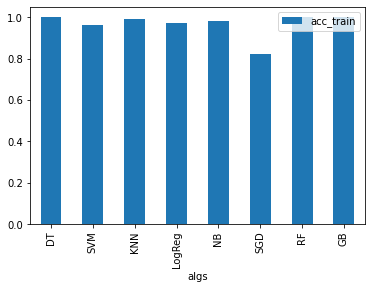

In [250]:
df_result.plot(x='algs', y='acc_train', kind='bar');

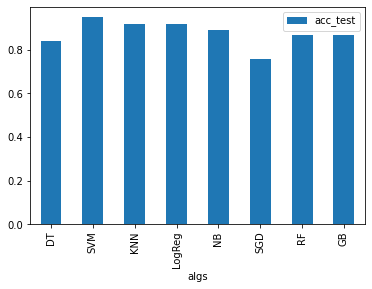

In [251]:
df_result.plot(x='algs', y='acc_test', kind='bar');

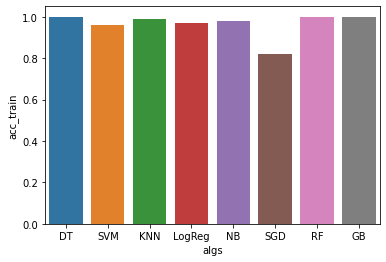

In [252]:
sns.barplot(x=df_result['algs'], y=df_result['acc_train']);

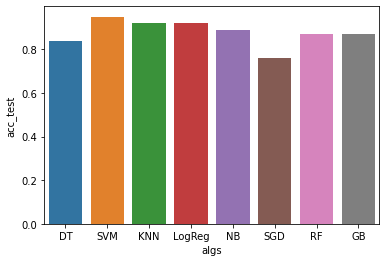

In [253]:
sns.barplot(x=df_result['algs'], y=df_result['acc_test']);

#### Avaliando Melhor com a Utilização da Validação Cruzada

In [183]:
scores = cross_val_score(KNeighborsClassifier, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

#### Lista semanal

1. Crie um algoritmo seu (sem usar aprendizado de máquina - dica: use sua criatividade e os insights que fizemos nas aulas desta semana) para baseado nas features do conjunto de dados Íris, classificar da melhor forma possível as amostras do conjunto de teste apresentadas no documento a seguir, que criamos durante as aulas desta semana:

**Criação do modelo**

In [254]:
# Crie um algoritmo seu
def JV(petal_comprimento, petal_largura):
  v1 = petal_comprimento
  v2 = petal_largura

  # 0 até 4 e 0 até 0.5 => setosa
  if(v1 < 4 and v2 < 0.5): return 'setosa'
  # maior que 5 e maior que 1 => virginica
  if(v1 >= 5 and v2 > 1): return 'virginica'
  # o resto
  else: return 'versicolor'

2. Também baseado no mesmo documento Jupyter Notebook referenciado na questão anterior, treine, avalie (acurácia) e ranqueie os melhores resultados para a resolução do seguinte problema de classificação: 

In [266]:
certas = 0
erradas = 0
for i in data.values:
  valor = JV(i[2], i[3])
  #print('Teste: '+ JV(i[2], i[3])+' valor real: '+ i[4])
  if(valor == i[4]):
    certas = certas + 1
  else:
    erradas = erradas + 1

acc = (certas / (certas + erradas)) * 100
# acurácia (quantidade de acertos / quantidade de amostras)?
print('Certas: ', certas)
print('Erradas: ', erradas)
print('Acurácia: ', acc)

Certas:  140
Erradas:  10
Acurácia:  93.33333333333333


In [256]:
modelos['JV'] = tree.DecisionTreeClassifier()

Quanto por cento no conjunto de teste você conseguiu acertar corretamente o rótulo (classe) no seu melhor algoritmo, ou seja, qual a acurácia (quantidade de acertos / quantidade de amostras)?

In [257]:
algs = []
resultados_train = []
resultados_test = []
for modelo_str in modelos.keys():
    modelo = modelos[modelo_str]
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    acuracia_train = metrics.accuracy_score(y_train, y_pred_train)
    acuracia_test = metrics.accuracy_score(y_test, y_pred_test)
    algs.append(modelo_str)
    resultados_train.append(round(acuracia_train, 2))
    resultados_test.append(round(acuracia_test, 2))
df_result = pd.DataFrame({'algs': algs, 'acc_train': resultados_train, 'acc_test': resultados_test })
df_result

,algs,acc_train,acc_test
0,DT,1.00,0.84
1,SVM,0.96,0.95
2,KNN,0.99,0.92
3,LogReg,0.97,0.92
4,NB,0.98,0.89
5,SGD,0.68,0.63
6,RF,1.00,0.87
7,GB,1.00,0.87
8,JV,1.00,0.84


In [258]:
df_result.sort_values('acc_test', ascending=False)

,algs,acc_train,acc_test
1,SVM,0.96,0.95
2,KNN,0.99,0.92
3,LogReg,0.97,0.92
4,NB,0.98,0.89
6,RF,1.00,0.87
7,GB,1.00,0.87
0,DT,1.00,0.84
8,JV,1.00,0.84
5,SGD,0.68,0.63


In [259]:
df_result = df_result.sort_values('acc_train', ascending=False)

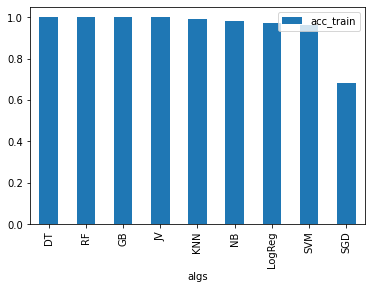

In [260]:
df_result.plot(x='algs', y='acc_train', kind='bar');

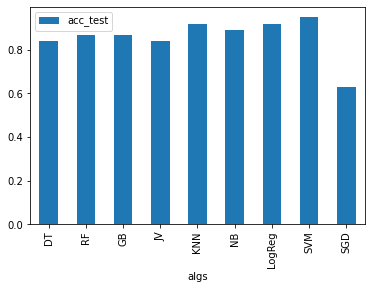

In [261]:
df_result.plot(x='algs', y='acc_test', kind='bar');

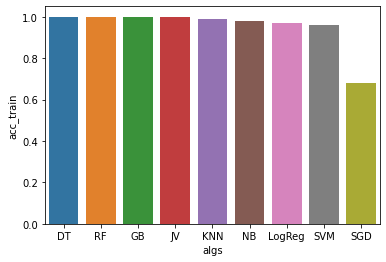

In [262]:
sns.barplot(x=df_result['algs'], y=df_result['acc_train']);

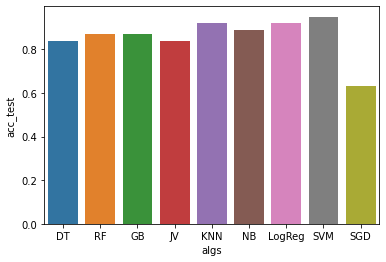

In [263]:
sns.barplot(x=df_result['algs'], y=df_result['acc_test']);

Detecção de câncer de mama - Conjunto de dados disponível em: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data 
Em caso de dúvida, veja também o Capítulo 2 do livro Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow.